# Loop model params :-)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.random import seed # to set seed
from tensorflow.random import set_seed # to set seed
import pandas as pd
import os
import tensorflow as tf
from tensorflow.python.client import device_lib

## Setting seed

In [2]:
# Apply seed
seed_value = 1338
set_seed(seed_value)
seed(seed_value)

## Image generator

In [3]:
#%% ImageDataGenerator

image_size = [200, 200]
batch = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    brightness_range=[0.5, 1.3]) # Best combination of settings, so far.


test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'train',
    target_size=image_size,
    batch_size=batch,
    class_mode='binary',
    seed=1338)

val_gen = test_datagen.flow_from_directory(
        'val',
        target_size=image_size,
        batch_size=batch,
        class_mode='binary',
        seed=1338)

test_gen = test_datagen.flow_from_directory(
    'test',
    target_size=image_size,
    batch_size=batch,
    class_mode='binary',
    seed=1338)

full_gen = train_datagen.flow_from_directory(
    'full_dataset',
    target_size=image_size,
    batch_size=batch,
    class_mode='binary',
    seed=1338)


Found 2076 images belonging to 2 classes.
Found 258 images belonging to 2 classes.
Found 262 images belonging to 2 classes.
Found 2334 images belonging to 2 classes.


## Loop

In [45]:
# Units
con_layer_1 = [16]
con_layer_2 = [32]
con_layer_3 = [32, 64]
con_layer_4 = [64, 128]
con_layer_5 = [64, 128]
act_funcs_con = ['relu']
act_funcs_con_last = ['selu', 'elu']
act_funcs_hidden = ['sigmoid', 'relu']
hidden_layer_1 = [512]
dropout_sizes = [0.5]
optimizers = ["adam"]
epoch_n = 25

In [46]:
# Number of models to be created:
model_count = len(con_layer_1) * len(con_layer_2) * len(con_layer_3) * len(con_layer_4) * len(con_layer_5) * len(act_funcs_con) * len(act_funcs_con) * len(act_funcs_con_last) * len(dropout_sizes) * len(optimizers) * len(hidden_layer_1) * len(act_funcs_hidden)

# Result array
results = pd.DataFrame(columns = ['loss',
                                  'val_loss',
                                  'accuracy',
                                  'val_accuracy',
                                  'con_layer_1',
                                  'con_layer_1_activation',
                                  'con_layer_2',
                                  'con_layer_2_activation',
                                  'con_layer_3',
                                  'con_layer_3_activation',
                                  'con_layer_4',
                                  'con_layer_4_activation',
                                  'con_layer_5',
                                  'con_layer_5_activation',
                                  'hidden_layer_1',
                                  'hidden_layer_1_activation',
                                  'dropout_sizes',
                                  'optimizers',
                                  'epoch',
                                  'epoch_n'])
print(f"There are {model_count} parameter combinations and {epoch_n} epochs")

There are 32 parameter combinations and 25 epochs


In [47]:
# Load results
results = pd.read_csv('loop_results.csv')
#results

In [21]:
# Loop tracking
count = 0 # To count loops
# Model loop
for con1 in con_layer_1:
    for con1_act in act_funcs_con:
        for con2 in con_layer_2:
            if(con1*3<con2):
                count = count+1
                print(f"Skipped model {count} out of {model_count}, bc. kernel difference from convolution 1 to 2.")
                continue
            for con2_act in act_funcs_con:
                for con3 in con_layer_3:
                    if(con2*3<con3):
                        count = count+1
                        print(f"Skipped model {count} out of {model_count}, bc. kernel difference from convolution 2 to 3.")
                        continue
                    for con3_act in act_funcs_con:
                        for con4 in con_layer_4:
                            if(con3*3<con4):
                                count = count+1
                                print(f"Skipped model {count} out of {model_count}, bc. kernel difference from convolution 3 to 4.")
                                continue
                            for con4_act in act_funcs_con:
                                for con5 in con_layer_5:
                                    if(con4*3<con5):
                                        count = count+1
                                        print(f"Skipped model {count} out of {model_count}, bc. kernel difference from convolution 4 to 5.")
                                        continue
                                    for con5_act in act_funcs_con_last:                        
                                        for hidden1 in hidden_layer_1:
                                            for hidden1_act in act_funcs_hidden:
                                                for dropout_size in dropout_sizes:
                                                    for optimizer in optimizers:
                                                        # Count and print progress
                                                        count = count+1

                                                        # Check if combination has been used
                                                        if(len(results.loc[(results['con_layer_1'] == con1) &
                                                                           (results['con_layer_1_activation'] <= con1_act) &
                                                                           (results['con_layer_2'] == con2) &
                                                                           (results['con_layer_2_activation'] == con2_act) &
                                                                           (results['con_layer_3'] == con3) &
                                                                           (results['con_layer_3_activation'] == con3_act) &
                                                                           (results['con_layer_4'] == con4) &
                                                                           (results['con_layer_4_activation'] == con4_act) &
                                                                           (results['con_layer_5'] == con5) &
                                                                           (results['con_layer_5_activation'] == con5_act) &
                                                                           (results['hidden_layer_1'] == hidden1) &
                                                                           (results['hidden_layer_1_activation'] == hidden1_act) &
                                                                           (results['dropout_sizes'] == dropout_size) &
                                                                           (results['optimizers'] == optimizer) &
                                                                           (results['epoch_n'] <= epoch_n)])):
                                                            print(f"Skipped model {count} out of {model_count}, bc. redundancy.")
                                                            continue
                                                        else:
                                                            print(f'Training model {count} out of {model_count}.')
                                                        # Model baseret på model.py kopieret 04/11 ~11.30
                                                        model = keras.Sequential([
                                                            # First convolution
                                                            layers.Conv2D(con1, (3,3), activation=con1_act, input_shape=(200, 200, 3)),
                                                            layers.MaxPooling2D(2,2), # halving the image size 

                                                            # Second convolution
                                                            layers.Conv2D(con2, (3,3), activation=con2_act),
                                                            layers.MaxPooling2D(2,2),

                                                            # Third convolution
                                                            layers.Conv2D(con3, (3,3), activation=con3_act),
                                                            layers.MaxPooling2D(2,2),

                                                            # Fourth convolution - hidden until after some finetuning
                                                            #layers.Conv2D(64, (3,3), activation='relu'),
                                                            #layers.MaxPooling2D(2,2),

                                                            # Fifth convolution - hidden until after some finetuning
                                                            #layers.Conv2D(64, (3,3), activation='relu'),
                                                            #layers.MaxPooling2D(2,2),

                                                            # Flatten results to feed into a Deep Nerual Net
                                                            layers.Flatten(),

                                                            # 512 neuron hidden layer
                                                            layers.Dense(hidden1, activation=hidden1_act),

                                                            # Dropout
                                                            layers.Dropout(dropout_size),

                                                            # Binary output layer
                                                            layers.Dense(1, activation='sigmoid')
                                                            ])

                                                        #model.summary() # model summary

                                                        model.compile(
                                                            loss='binary_crossentropy',
                                                            optimizer=optimizer,
                                                            metrics=['accuracy']) # compiling model

                                                        # Model fitting fra model_2.py kopieret 4/11 ~11.30
                                                        # Callbacks for tensorboard 
                                                        tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs") # tensorboard --logdir ./logs

                                                        # Step sizes for train, validation and testing
                                                        STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
                                                        STEP_SIZE_VAL=val_gen.n//val_gen.batch_size
                                                        STEP_SIZE_TEST=test_gen.n//test_gen.batch_size

                                                        # Fitting model
                                                        history = model.fit(
                                                            train_gen,
                                                            steps_per_epoch=STEP_SIZE_TRAIN,
                                                            epochs=epoch_n, # for at spare lidt tid
                                                            validation_data=val_gen,
                                                            validation_steps=STEP_SIZE_VAL,
                                                            callbacks=[tensorboard_callback],
                                                            verbose = False)

                                                        # Get results (from history)
                                                        history = history.history

                                                        # Append each epoch
                                                        for h in range(len(history['loss'])):
                                                            row = {'loss':history['loss'][h],
                                                                   'val_loss':history['val_loss'][h],
                                                                   'accuracy':history['accuracy'][h],
                                                                   'val_accuracy': history['val_accuracy'][h],
                                                                   'con_layer_1': con1,
                                                                   'con_layer_1_activation': con1_act,
                                                                   'con_layer_2': con2,
                                                                   'con_layer_2_activation': con2_act,
                                                                   'con_layer_3': con3,
                                                                   'con_layer_3_activation': con3_act,
                                                                   'con_layer_4': con4,
                                                                   'con_layer_4_activation': con4_act,
                                                                   'con_layer_5': con5,
                                                                   'con_layer_5_activation': con5_act,
                                                                   'hidden_layer_1': hidden1,
                                                                   'hidden_layer_1_activation': hidden1_act,
                                                                   'dropout_sizes': dropout_size,
                                                                   'optimizers': optimizer,
                                                                   'epoch': (h+1),
                                                                   'epoch_n': epoch_n}
                                                            results = results.append(row, ignore_index=True)
                                                        # Save model
                                                        results.to_csv('loop_results_new.csv',index=False)

print("All done")

Training model 1 out of 432.


KeyboardInterrupt: 

In [15]:
# Save model
results.to_csv('loop_results.csv',index=False)

## Bedste performende Old data

In [ ]:
# Load results
results = pd.read_csv('loop_results_old.csv')
#results

In [37]:
# Filter by uniqe combination
filt_results = results.groupby(["con_layer_1", "con_layer_1_activation", "con_layer_2", "con_layer_2_activation", "con_layer_3", "con_layer_3_activation", "hidden_layer_1", "hidden_layer_1_activation", "dropout_sizes", "optimizers"]).max('val_accuracy')

# Top 20
best_results20 = filt_results.nlargest(20, 'val_accuracy')

best_results20


loss  \
con_layer_1 con_layer_1_activation con_layer_2 con_layer_2_activation con_layer_3 con_layer_3_activation hidden_layer_1 hidden_layer_1_activation dropout_sizes optimizers             
16          relu                   32          relu                   32          elu                    512            sigmoid                   0.2           adam        0.770280   
            elu                    32          relu                   32          tanh                   512            selu                      0.2           adam        1.900963   
                                                                                                                        sigmoid                   0.2           adam        0.802150   
            relu                   32          elu                    32          tanh                   512            selu                      0.2           adam        1.415061   
                                               relu                   32          selu                   512            elu                       0.2           adam        1.070527   
                                                                      64          relu                   512            sigmoid                   0.2           adam        0.718955   
            elu                    32          relu                   32          elu                    512            elu                       0.2           adam        1.254370   
                                                                                  relu                   512            sigmoid                   0.2           adam        0.738471   
            relu                   32          relu                   64          selu                   512            relu                      0.2           adam        0.980724   
                                               tanh                   32          tanh                   512            sigmoid                   0.2           adam        1.150653   
32          relu                   32          relu                   32          relu                   256            relu                      0.1           adam        0.724877   
16          elu                    32          elu                    32          relu                   512            selu                      0.2           sgd         0.698535   
                                               relu                   32          tanh                   512            relu                      0.2           adam        0.888702   
            relu                   32          elu                    32          elu                    512            sigmoid                   0.2           adam        0.782678   
                                               relu                   32          elu                    512            selu                      0.2           adam        0.972896   
                                                                                  relu                   512            sigmoid                   0.2           adam        0.758551   
                                                                                  selu                   512            sigmoid                   0.2           adam        0.862392   
                                               tanh                   32          elu                    512            selu                      0.2           adam        1.049320   
                                                                                  selu                   512            sigmoid                   0.2           adam        0.843115   
                                               elu                    32          elu                    512            selu                      0.2           adam        1.149387   

                                                                                                                               

#### Feature search

In [18]:
# Get top 1000 results
best_results100 = results.nlargest(1000, 'val_accuracy') # We only need top 100, but watch as we go
# Group by uniqe combination, and filter by largest val_accuracy
best_results100 = best_results100.groupby(["con_layer_1", "con_layer_1_activation", "con_layer_2", "con_layer_2_activation", "con_layer_3", "con_layer_3_activation", "hidden_layer_1", "hidden_layer_1_activation", "dropout_sizes", "optimizers"]).max('val_accuracy')
# Now get top 100 results from the filtered ones
best_results100 = best_results100.nlargest(100, 'val_accuracy')
# Choose relevant features for observation
best_results100 = best_results100.filter(items=["con_layer_1", "con_layer_1_activation", "con_layer_2", "con_layer_2_activation", "con_layer_3", "con_layer_3_activation", "hidden_layer_1", "hidden_layer_1_activation", "dropout_sizes", "optimizers"])
# Ungroup
best_results100 = best_results100.reset_index()

# Close all open plots (i had some issues with lingering plots)
plt.close('all')

# Color palette used for bars in plots
colors = ['#399E5A', '#69C989', '#87D4A1', '#A5DFB8', '#C3E9D0']

# Testing
#best_results100

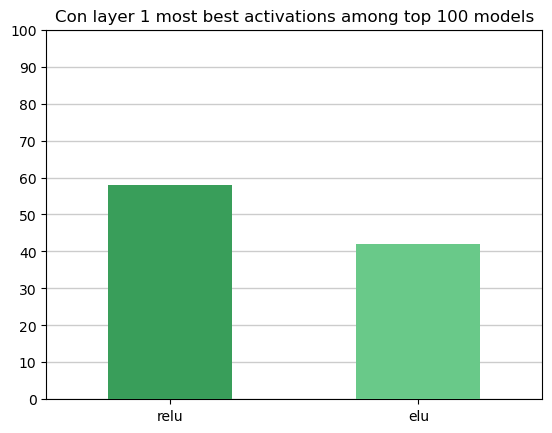

In [25]:
# Most used con_layer_1_activation of top 100
#best_results_con_layer_1_activation = best_results100["con_layer_1_activation"].value_counts(normalize=True)
best_results100['con_layer_1_activation'].value_counts()[:100].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.yticks(np.arange(0, 101, 10))
plt.title("Convolution layer 1 best activations among top 100 models")
plt.xticks(rotation='horizontal')
plt.savefig('plots/optimal_con_1_act.png')
plt.show()


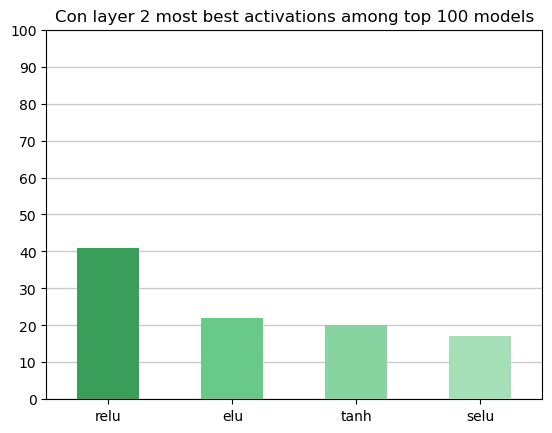

In [26]:
# Most used con_layer_2_activation of top 100
#best_results_con_layer_2_activation = best_results100["con_layer_2_activation"].value_counts(normalize=True)
best_results100['con_layer_2_activation'].value_counts()[:100].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.yticks(np.arange(0, 101, 10))
plt.title("Con layer 2 most best activations among top 100 models")
plt.xticks(rotation='horizontal')
plt.savefig('plots/optimal_con_2_act.png')
plt.show()

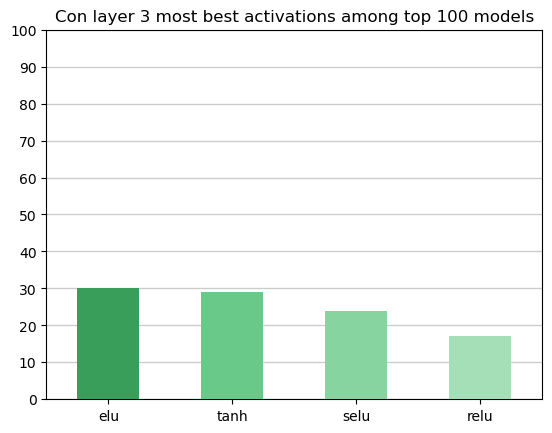

In [27]:
# Most used con_layer_3_activation of top 100
#best_results_con_layer_3_activation = best_results100["con_layer_3_activation"].value_counts(normalize=True)
best_results100['con_layer_3_activation'].value_counts()[:100].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation='horizontal')
plt.title("Con layer 3 most best activations among top 100 models")
plt.savefig('plots/optimal_con_3_act.png')
plt.show()

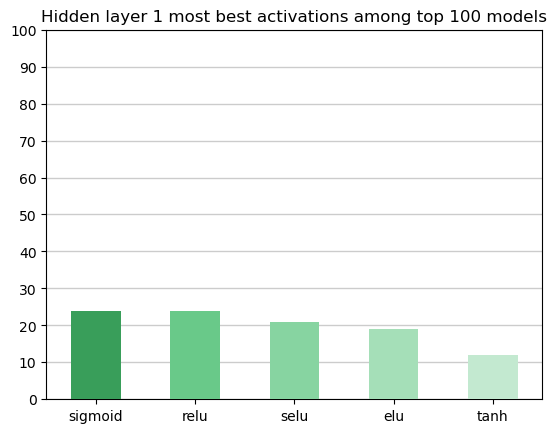

In [28]:
# Most used hidden_layer_1_activation of top 100
#best_results_hidden_layer_1_activation = best_results100["hidden_layer_1_activation"].value_counts(normalize=True)
best_results100['hidden_layer_1_activation'].value_counts()[:100].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 101, 10))
plt.title("Hidden layer 1 most best activations among top 100 models")
plt.savefig('plots/optimal_hidden_1_act.png')
plt.show()

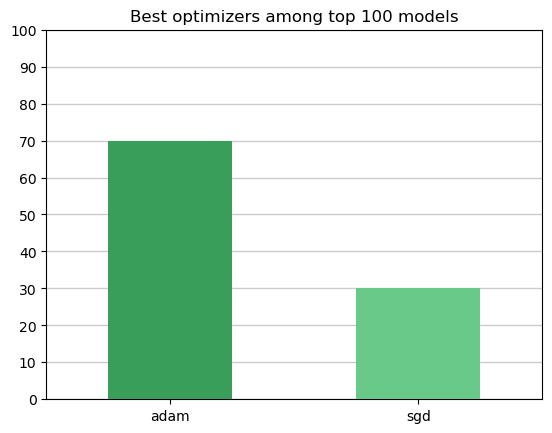

In [29]:
# Most used optimizers of top 100
#best_results_optimizers = best_results100["optimizers"].value_counts(normalize=True)
best_results100['optimizers'].value_counts()[:100].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 101, 10))
plt.title("Best optimizers among top 100 models")
plt.savefig('plots/optimal_optimizer.png')
plt.show()

## Modeller med potentialle for at kunne nå bedre potentialle med flere epoch:


In [24]:
results_gowing = filt_results.sort_values(by=['val_accuracy', 'accuracy'], ascending=False)
results_gowing = results_gowing[results_gowing["epoch"] == 10]

results_gowing.head(10)

loss  \
con_layer_1 con_layer_1_activation con_layer_2 con_layer_2_activation con_layer_3 con_layer_3_activation hidden_layer_1 hidden_layer_1_activation dropout_sizes optimizers             
16          relu                   32          relu                   32          elu                    512            sigmoid                   0.2           adam        0.770280   
            elu                    32          relu                   32          tanh                   512            selu                      0.2           adam        1.900963   
            relu                   32          relu                   64          relu                   512            sigmoid                   0.2           adam        0.718955   
                                               elu                    32          tanh                   512            selu                      0.2           adam        1.415061   
                                               relu                   32          selu                   512            elu                       0.2           adam        1.070527   
            elu                    32          relu                   32          tanh                   512            sigmoid                   0.2           adam        0.802150   
32          relu                   32          relu                   32          relu                   256            relu                      0.1           adam        0.724877   
16          elu                    32          relu                   32          relu                   512            sigmoid                   0.2           adam        0.738471   
            relu                   32          relu                   64          selu                   512            relu                      0.2           adam        0.980724   
            elu                    32          relu                   32          elu                    512            elu                       0.2           adam        1.254370   

                                                                                                                                                                            val_loss  \
con_layer_1 con_layer_1_activation con_layer_2 con_layer_2_activation con_layer_3 con_layer_3_activation hidden_layer_1 hidden_layer_1_activation dropout_sizes optimizers             
16          relu                   32          relu                   32          elu                    512            sigmoid                   0.2           adam        0.667535   
            elu                    32          relu                   32          tanh                   512            selu                      0.2           adam        0.684183   
            relu                   32          relu                   64          relu                   512            sigmoid                   0.2           adam        0.677332   
                                               elu                    32          tanh                   512            selu                      0.2           adam        0.698331   
                                               relu                   32          selu                   512            elu                       0.2           adam        0.706153   
            elu                    32          relu                   32          tanh                   512            sigmoid                   0.2           adam        0.702478   
32          relu                   32          relu                   32          relu                   256            relu                      0.1           adam        0.686644   
16          elu                    32          relu                   32          relu                   512            sigmoid                   0.2           adam        0.758455   
            relu                   32          relu                   64          selu                   512            relu   

In [167]:
print("Observation: Det er stort set alle")

Observation: Det er stort set alle


## Best performance new data

In [ ]:
# Load results
results = pd.read_csv('loop_results.csv')
#results

In [54]:
# Filter by uniqe combination
filt_results = results.groupby(["con_layer_1", "con_layer_1_activation", "con_layer_2", "con_layer_2_activation", "con_layer_3", "con_layer_3_activation", "con_layer_4", "con_layer_4_activation", "con_layer_5", "con_layer_5_activation", "hidden_layer_1", "hidden_layer_1_activation", "dropout_sizes", "optimizers"]).max('val_accuracy')

# Top 20
best_results10 = filt_results.nlargest(10, 'val_accuracy')

# Ungroup
best_results10 = best_results10.reset_index()

best_results10

,con_layer_1,con_layer_1_activation,con_layer_2,con_layer_2_activation,con_layer_3,con_layer_3_activation,con_layer_4,con_layer_4_activation,con_layer_5,con_layer_5_activation,hidden_layer_1,hidden_layer_1_activation,dropout_sizes,optimizers,loss,val_loss,accuracy,val_accuracy,epoch,epoch_n
0,16,relu,32,relu,64,relu,128,relu,128,selu,512,sigmoid,0.5,adam,0.768349,0.694389,0.785225,0.796875,25,25
1,16,relu,32,relu,32,relu,64,relu,64,elu,512,sigmoid,0.5,adam,0.810596,0.684790,0.772994,0.781250,25,25
2,16,relu,32,relu,64,relu,64,relu,128,selu,512,sigmoid,0.5,adam,0.894906,0.753336,0.757828,0.781250,25,25
3,16,relu,32,relu,64,relu,128,relu,64,elu,512,sigmoid,0.5,adam,0.868262,0.695334,0.761742,0.777344,25,25
4,16,relu,32,relu,64,relu,128,relu,128,elu,512,sigmoid,0.5,adam,0.737378,0.672668,0.785714,0.777344,25,25
5,16,relu,32,relu,64,relu,64,relu,128,selu,512,relu,0.5,adam,0.738355,0.676382,0.778376,0.769531,25,25
6,16,relu,32,relu,32,relu,64,relu,128,elu,512,sigmoid,0.5,adam,0.803157,0.745837,0.750978,0.765625,25,25
7,16,relu,32,relu,64,relu,64,relu,64,elu,512,sigmoid,0.5,adam,0.762444,0.659775,0.771526,0.765625,25,25
8,16,relu,32,relu,64,relu,64,relu,64,selu,512,relu,0.5,adam,0.815839,0.676638,0.789139,0.765625,25,25
9,16,relu,32,relu,32,relu,64,relu,64,elu,512,relu,0.5,adam,0.718530,0.692198,0.756849,0.761719,25,25


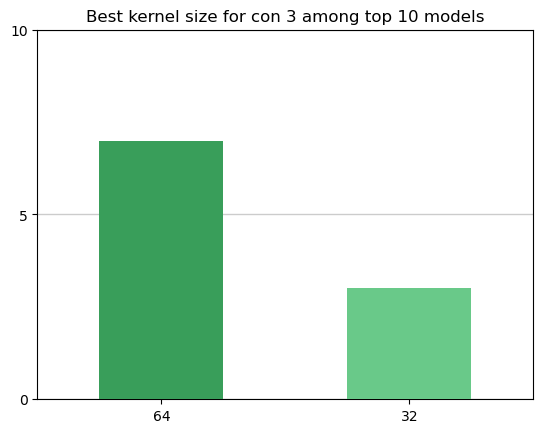

In [66]:
# Most used con_layer_3
#best_results_optimizers = best_results100["optimizers"].value_counts(normalize=True)
best_results10['con_layer_3'].value_counts()[:10].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 11, 5))
plt.title("Best kernel size for con 3 among top 10 models")
plt.savefig('plots/new_optimal_kernel_con_3.png')
plt.show()

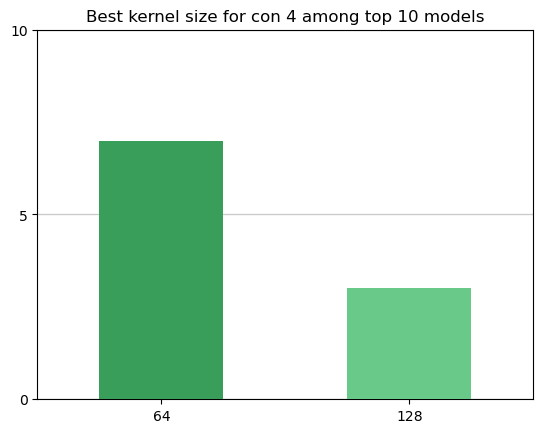

In [67]:
# Most used con_layer_4
#best_results_optimizers = best_results100["optimizers"].value_counts(normalize=True)
best_results10['con_layer_4'].value_counts()[:10].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 11, 5))
plt.title("Best kernel size for con 4 among top 10 models")
plt.savefig('plots/new_optimal_kernel_con_4.png')
plt.show()

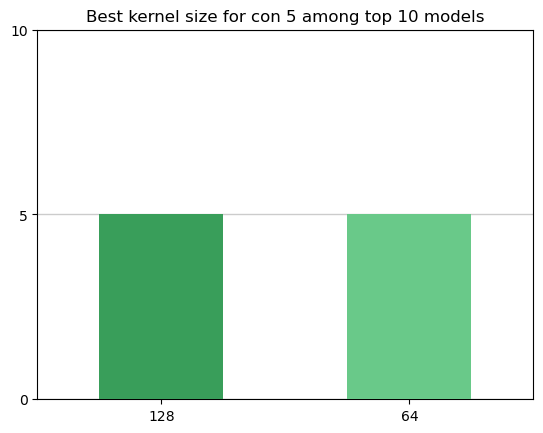

In [68]:
# Most used con_layer_5
#best_results_optimizers = best_results100["optimizers"].value_counts(normalize=True)
best_results10['con_layer_5'].value_counts()[:10].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 11, 5))
plt.title("Best kernel size for con 5 among top 10 models")
plt.savefig('plots/new_optimal_kernel_con_5.png')
plt.show()

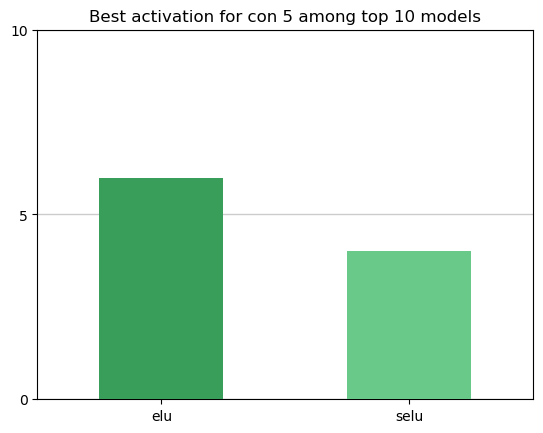

In [69]:
# Most used con_layer_5_activation
#best_results_optimizers = best_results100["optimizers"].value_counts(normalize=True)
best_results10['con_layer_5_activation'].value_counts()[:10].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 11, 5))
plt.title("Best activation for con 5 among top 10 models")
plt.savefig('plots/new_optimal_activation_con_5.png')
plt.show()

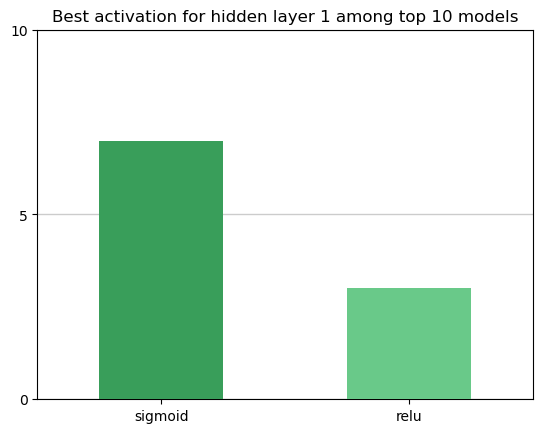

In [70]:
# Most used hidden_layer_1_activation
#best_results_optimizers = best_results100["optimizers"].value_counts(normalize=True)
best_results10['hidden_layer_1_activation'].value_counts()[:10].plot(kind='bar', zorder=3, color = colors)
plt.grid(color='#ccc', linestyle='-', linewidth=1, axis="y",zorder=0)
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 11, 5))
plt.title("Best activation for hidden layer 1 among top 10 models")
plt.savefig('plots/new_optimal_activation_hidden_1.png')
plt.show()